In [3]:
# !pip install scipy
# https://www.kaggle.com/rafetcan/generative-adversarial-n-gans-for-beginners

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [3]:
import matplotlib

In [7]:
mnist_train=pd.read_csv('mnist_train.csv')
mnist_test=pd.read_csv('mnist_test.csv')

In [9]:
mnist_train.shape
mnist_test.shape
mnist_train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [8]:
mnist_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [9]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# plt.figure(figsize=(15,7))
mnist_train['label'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [11]:
# y_train=mnist_train['label']
x_train=mnist_train.drop(['label'],axis=1).values
y_train=mnist_train.label.values

In [12]:
x_train
# y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

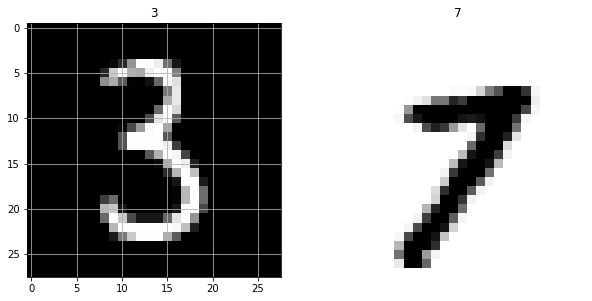

In [13]:
plt.figure(figsize=(10,8))
img1=x_train[54930]
img1=img1.reshape((28,28))
plt.subplot(1,2,1)
plt.imshow(img1,cmap='gray')
plt.title(y_train[54930])
plt.grid()

img2=x_train[40000]
img2=img2.reshape((28,28))
plt.subplot(1,2,2)
plt.imshow(img2,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.title(y_train[40000])
plt.axis("off")
plt.grid()

plt.show()

In [14]:
 shuffle_index=np.random.permutation(60000)
    
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index]

Creating a 2-detector

In [15]:
y_train=y_train.astype(np.int8)
y_train=(y_train==2)

In [16]:
from sklearn.linear_model import LogisticRegression
#LogisticRegression is a classification algo

In [17]:
y_train

array([ True, False, False, ..., False, False, False])

In [18]:
clf=LogisticRegression(tol=0.1)

In [19]:
clf.fit(x_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.1, verbose=0,
                   warm_start=False)

In [20]:
# any_digit=x_train[2341]
# clf.predict([img1])
# any_digit
# plt.figure(figsize=(10,8))
any_digit=x_train[19930]
# img1=img1.reshape((28,28))
# plt.subplot(1,2,1)
# plt.imshow(img1,cmap='gray')
# plt.title(y_train[19930])
# plt.grid()
clf.predict([any_digit])

array([ True])

In [21]:
from sklearn.model_selection import cross_val_score


In [23]:
a=cross_val_score(clf,x_train,y_train,cv=3,scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
a.mean()

0.97775